# Warners & Bros                                            December 10, 2015


I. Restitution :    répartition de travail

In [2]:
#Présentation de la répartition de travail

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import seaborn as sns
#from binning import *
from pandas.tools.plotting import radviz, scatter_matrix
import collections
%matplotlib inline

In [4]:
#lister les films de gros budgets depuis l'année 1990
#http://www.the-numbers.com/movie/budgets/all

DFhistNbud=pd.read_csv('ListWB1920bis.csv')



DFhistNbud=DFhistNbud.dropna()

DFBudget=DFhistNbud.head(100)

In [5]:
#Reformater des champs de montants en chiffres as lieu de string 
DFBudget['Domestic Gross']=DFBudget['Domestic Gross'].str.replace('$', '')

DFBudget['Domestic Gross']=DFBudget['Domestic Gross'].str.replace(',', '').astype('float')

DFBudget['Production Budget']=DFBudget['Production Budget'].str.replace('$', '')
DFBudget['Production Budget']=DFBudget['Production Budget'].str.replace(',', '').astype('float')

DFBudget['Worldwide Gross']=DFBudget['Worldwide Gross'].str.replace('$', '')
DFBudget['Worldwide Gross']=DFBudget['Worldwide Gross'].str.replace(',', '').astype('float')

#DFhistNbud

C:\Anaconda1\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda1\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda1\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

In [6]:
DFBudget

,Rank,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
0,1,12/18/2009,Avatar,425000000,760507625,2783918982
2,2,5/24/2007,Pirates of the Caribbean: At World's End,300000000,309420425,963420425
4,3,11/6/2015,Spectre,300000000,185745058,793245058
6,4,7/20/2012,The Dark Knight Rises,275000000,448139099,1084439099
8,5,7/2/2013,The Lone Ranger,275000000,89289910,259989910
10,6,3/9/2012,John Carter,275000000,73058679,282778100
12,7,11/24/2010,Tangled,260000000,200821936,586581936
14,8,5/4/2007,Spider-Man 3,258000000,336530303,890875303
16,9,5/1/2015,The Avengers: Age of Ultron,250000000,459005868,1404705868
18,10,12/14/2012,The Hobbit: An Unexpected Journey,250000000,303003568,1017003568


In [7]:

DFBudget=DFBudget.rename(columns={'Domestic Gross': 'USA revenu'})
DFBudget=DFBudget.rename(columns={'Worldwide Gross': 'Worldwide revenu'})
DFBudget


,Rank,Release Date,Movie,Production Budget,USA revenu,Worldwide revenu
0,1,12/18/2009,Avatar,425000000,760507625,2783918982
2,2,5/24/2007,Pirates of the Caribbean: At World's End,300000000,309420425,963420425
4,3,11/6/2015,Spectre,300000000,185745058,793245058
6,4,7/20/2012,The Dark Knight Rises,275000000,448139099,1084439099
8,5,7/2/2013,The Lone Ranger,275000000,89289910,259989910
10,6,3/9/2012,John Carter,275000000,73058679,282778100
12,7,11/24/2010,Tangled,260000000,200821936,586581936
14,8,5/4/2007,Spider-Man 3,258000000,336530303,890875303
16,9,5/1/2015,The Avengers: Age of Ultron,250000000,459005868,1404705868
18,10,12/14/2012,The Hobbit: An Unexpected Journey,250000000,303003568,1017003568


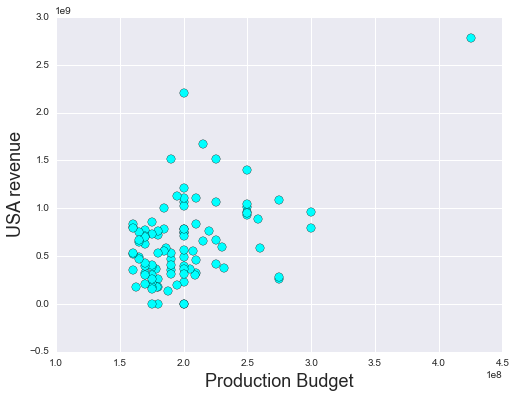

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

y=DFBudget[['Worldwide revenu']]
x=DFBudget[['Production Budget']]
fig=plt.figure(figsize=(8,6))
plt.ylabel(r'USA revenue', fontsize=18)
plt.xlabel(r'Production Budget', fontsize=18)


plt.scatter(x, y, color='cyan', s=70, edgecolor='black',
           marker='o') #faceted=True)
plt.show()

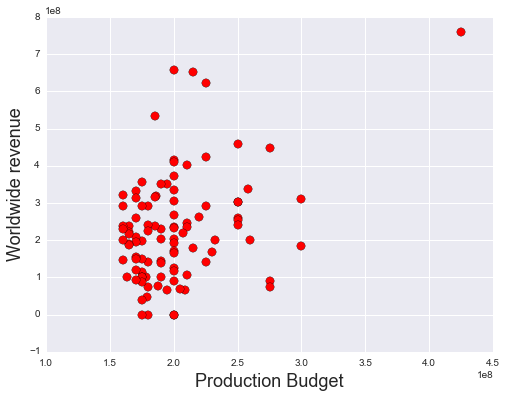

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

y=DFBudget[['USA revenu']]
x=DFBudget[['Production Budget']]
fig=plt.figure(figsize=(8,6))
plt.ylabel(r'Worldwide revenue', fontsize=18)
plt.xlabel(r'Production Budget', fontsize=18)


plt.scatter(x, y, color='red', s=70, edgecolor='black',
           marker='o') #faceted=True)
plt.show()

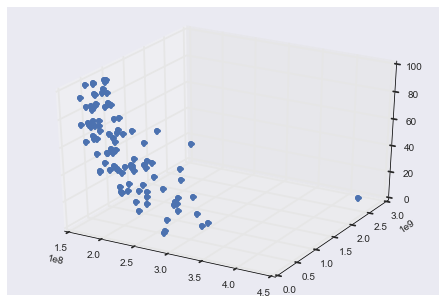

In [10]:
from mpl_toolkits.mplot3d import Axes3D

minPB=DFBudget['Production Budget'].min()*0.001

maxPB=DFBudget['Production Budget'].max()*0.001

minWW=DFBudget['Worldwide revenu'].min()*0.001

maxWW=DFBudget['Worldwide revenu'].max()*0.001
minUS=DFBudget['USA revenu'].min()*0.001

maxUS=DFBudget['USA revenu'].max()*0.001

Yaxis=DFBudget['Rank']


XX=np.arange(minPB,maxPB,0.5)
YY=np.arange(minWW,maxWW,0.5)
zz=np.arange(minUS,maxUS,0.5)




fig=plt.figure()
ax=Axes3D(fig)
ax.plot(DFBudget['Production Budget'],DFBudget['Worldwide revenu'],Yaxis,'o')



import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import mpl_toolkits.mplot3d.axes3d as axes3d


In [11]:
'''
dfFilmsPrd=pd.read_csv('ListWBFm2000.csv')

dfFilmsPrd1=dfFilmsPrd.iloc[:, 0:2]

dfFilmsPrd1

les idees
  les succes de Warner Bros
   http://www.boxofficemojo.com/studio/chart/?studio=warnerbros.htm
les succes du box-office 
Liste des plus gros succès du box-office mondial — Wikipédia

il faut s'intéresser aux dix dernières années

box-office 

BOX-OFFICE MONDIAL (www.cinemondial.com)

 
 
 
 
 
 
BOX-OFFICE MONDIAL (www.cinemondial.com)
No TITRE FRANCAIS titre original Annee de sortie Cumul recettes en $US 1 AVATAR 2009 2 757 400 000 2 TITANIC 1998 1 835 400 000 3 JURASSIC WORLD 2015 1 668 800 000 4 THE AVENGERS 2012 1 511 700 000 5
Afficher sur www.cinemondial.com
Aperçu par Yahoo
 
les tendances
Quand les séries s’emparent du grand écran



Autre piste, les films d'animation, grâce aux nouvelles technologies sont plus rentables
https://fr.wikipedia.org/wiki/Box-office_des_films_d'animation_Disney

https://fr.wikipedia.org/wiki/Box-office_des_films_d'animation_Pixar

'''

"\ndfFilmsPrd=pd.read_csv('ListWBFm2000.csv')\n\ndfFilmsPrd1=dfFilmsPrd.iloc[:, 0:2]\n\ndfFilmsPrd1\n\nles idees\n  les succes de Warner Bros\n   http://www.boxofficemojo.com/studio/chart/?studio=warnerbros.htm\nles succes du box-office \nListe des plus gros succ\xc3\xa8s du box-office mondial \xe2\x80\x94 Wikip\xc3\xa9dia\n\nil faut s'int\xc3\xa9resser aux dix derni\xc3\xa8res ann\xc3\xa9es\n\nbox-office \n\nBOX-OFFICE MONDIAL (www.cinemondial.com)\n\n \n \n \n \n \n \nBOX-OFFICE MONDIAL (www.cinemondial.com)\nNo TITRE FRANCAIS titre original Annee de sortie Cumul recettes en $US 1 AVATAR 2009 2 757 400 000 2 TITANIC 1998 1 835 400 000 3 JURASSIC WORLD 2015 1 668 800 000 4 THE AVENGERS 2012 1 511 700 000 5\nAfficher sur www.cinemondial.com\nAper\xc3\xa7u par Yahoo\n \nles tendances\nQuand les s\xc3\xa9ries s\xe2\x80\x99emparent du grand \xc3\xa9cran\n\n\n\nAutre piste, les films d'animation, gr\xc3\xa2ce aux nouvelles technologies sont plus rentables\nhttps://fr.wikipedia.org/wiki/Box